In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import datetime as dt
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib.collections as collections

In [5]:
bond_data=pd.read_excel("allbond.xlsx",parse_dates=True)

In [257]:
bond_data.pop("CWB US Equity")

1998-01-01        NaN
1998-01-02        NaN
1998-01-03        NaN
1998-01-04        NaN
1998-01-05        NaN
1998-01-06        NaN
1998-01-07        NaN
1998-01-08        NaN
1998-01-09        NaN
1998-01-10        NaN
1998-01-11        NaN
1998-01-12        NaN
1998-01-13        NaN
1998-01-14        NaN
1998-01-15        NaN
1998-01-16        NaN
1998-01-17        NaN
1998-01-18        NaN
1998-01-19        NaN
1998-01-20        NaN
1998-01-21        NaN
1998-01-22        NaN
1998-01-23        NaN
1998-01-24        NaN
1998-01-25        NaN
1998-01-26        NaN
1998-01-27        NaN
1998-01-28        NaN
1998-01-29        NaN
1998-01-30        NaN
               ...   
2019-03-13    52.0262
2019-03-14    52.0063
2019-03-15    52.1559
2019-03-16    52.1559
2019-03-17    52.1559
2019-03-18    52.1659
2019-03-19    52.2856
2019-03-20    52.2058
2019-03-21    52.7046
2019-03-22    51.8766
2019-03-23    51.8766
2019-03-24    51.8766
2019-03-25    51.8167
2019-03-26    51.8766
2019-03-27

In [258]:
bond_data.dropna(axis=0,how='any')

,LBUSTRUU Index,IBOXHY Index,JPEICORE Index,PFF US Equity,DXY Curncy,TLT US Equity,SHV US Equity
2007-03-30,1311.13,142.9097,263.891,22.6033,82.930,59.5814,99.4318
2007-03-31,1311.13,142.9097,263.891,22.6033,82.930,59.5814,99.4318
2007-04-01,1311.13,142.9097,263.891,22.6033,82.930,59.5814,99.4318
2007-04-02,1311.69,142.7974,263.962,22.6529,82.870,59.6803,99.4361
2007-04-03,1310.93,142.7373,264.238,22.7069,83.150,59.6058,99.4544
2007-04-04,1311.78,142.7913,264.496,22.6438,82.960,59.6668,99.5091
2007-04-05,1310.88,142.8371,264.547,22.6754,82.677,59.4432,99.5000
2007-04-06,1310.88,142.8371,264.547,22.6754,82.992,59.4432,99.5000
2007-04-07,1310.88,142.8371,264.547,22.6754,82.992,59.4432,99.5000
2007-04-08,1310.88,142.8371,264.547,22.6754,82.992,59.4432,99.5000


In [259]:
AGG=bond_data["LBUSTRUU Index"]
HYB=bond_data["IBOXHY Index"]
EMB=bond_data["JPEICORE Index"]
PFF=bond_data["PFF US Equity"]
#CWB=bond_data["CWB US Equity"]
TLT=bond_data["TLT US Equity"]
SHV=bond_data["SHV US Equity"]
DXY=bond_data["DXY Curncy"]

In [260]:
AGG_return=AGG/AGG.shift(1)
HYB_return=HYB/HYB.shift(1)
EMB_return=EMB/EMB.shift(1)
PFF_return=PFF/PFF.shift(1)
CWB_return=CWB/CWB.shift(1)
TLT_return=TLT/TLT.shift(1)
SHV_return=SHV/SHV.shift(1)

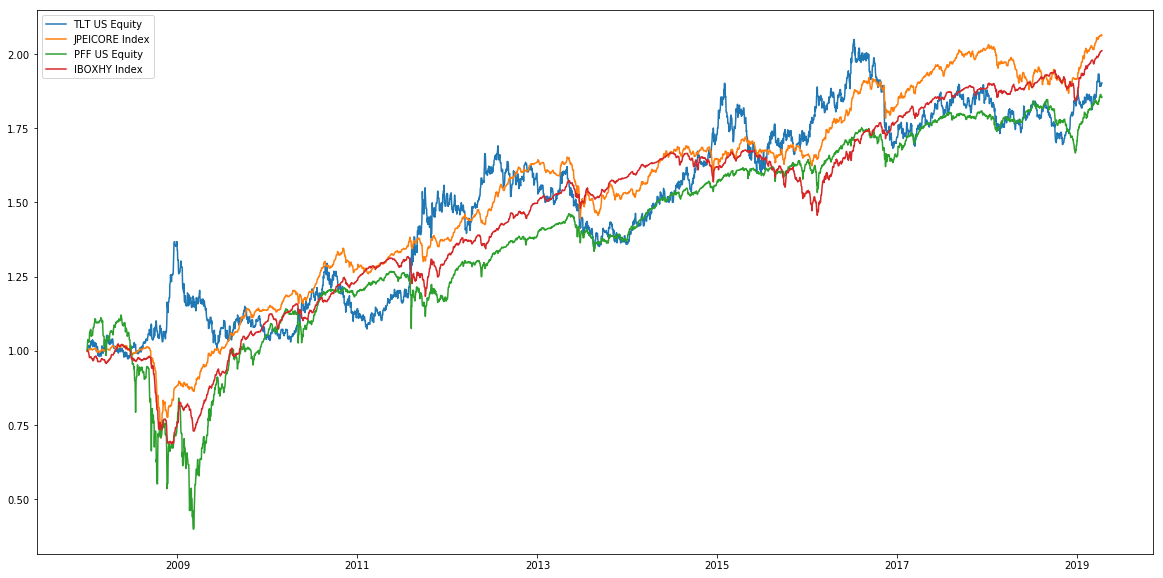

In [261]:
plt.figure(figsize=(20,10))
#plt.plot(AGG.loc["2008-01-01":]/AGG.loc["2008-01-01"])
plt.plot(TLT.loc["2008-01-01":]/TLT.loc["2008-01-01"])
plt.plot(EMB.loc["2008-01-01":]/EMB.loc["2008-01-01"])
plt.plot(PFF.loc["2008-01-01":]/PFF.loc["2008-01-01"])
#plt.plot(DXY.loc["2008-01-01":]/DXY.loc["2008-01-01"])
plt.plot(HYB.loc["2008-01-01":]/HYB.loc["2008-01-01"])
#plt.plot(CWB.loc["2008-01-01":]/CWB.loc["2008-01-01"])
plt.legend()
plt.show()

In [262]:
pd.concat([HYB_return,EMB_return,PFF_return])

1998-01-01         NaN
1998-01-02         NaN
1998-01-03         NaN
1998-01-04         NaN
1998-01-05         NaN
1998-01-06         NaN
1998-01-07         NaN
1998-01-08         NaN
1998-01-09         NaN
1998-01-10         NaN
1998-01-11         NaN
1998-01-12         NaN
1998-01-13         NaN
1998-01-14         NaN
1998-01-15         NaN
1998-01-16         NaN
1998-01-17         NaN
1998-01-18         NaN
1998-01-19         NaN
1998-01-20         NaN
1998-01-21         NaN
1998-01-22         NaN
1998-01-23         NaN
1998-01-24         NaN
1998-01-25         NaN
1998-01-26         NaN
1998-01-27         NaN
1998-01-28         NaN
1998-01-29         NaN
1998-01-30         NaN
                ...   
2019-03-13    1.002743
2019-03-14    1.000547
2019-03-15    1.001641
2019-03-16    1.000000
2019-03-17    1.000000
2019-03-18    0.999180
2019-03-19    0.995903
2019-03-20    0.999176
2019-03-21    1.002472
2019-03-22    0.996713
2019-03-23    1.000000
2019-03-24    1.000000
2019-03-25 

In [263]:
bond_return=pd.concat([AGG_return,HYB_return,EMB_return,PFF_return,TLT_return,SHV_return],axis=1).dropna()

In [270]:
bond_return

,LBUSTRUU Index,IBOXHY Index,JPEICORE Index,PFF US Equity,TLT US Equity,SHV US Equity
2007-03-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-02,1.000427,0.999214,1.000269,1.002194,1.001660,1.000043
2007-04-03,0.999421,0.999579,1.001046,1.002384,0.998752,1.000184
2007-04-04,1.000648,1.000378,1.000976,0.997221,1.001023,1.000550
2007-04-05,0.999314,1.000321,1.000193,1.001396,0.996253,0.999909
2007-04-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-09,0.997498,1.000536,0.998167,1.000794,0.993390,1.000091


In [264]:
gvbond_return=pd.concat([AGG_return,TLT_return,SHV_return],axis=1).dropna()

In [265]:
def VarianceSum(data): # 傳入dataframe
    a = m.log(2) / (500/2)
    variance_sum = 0
    for k in range(len(data.columns)):
        
        data_sum = 0
        weight_sum = 0
        data_var = 0
        # 先算平均
        for p in range(len(data.index)):
            w = m.exp(-(len(data.index)-1-p) * a)
            weight_sum += w
            data_sum += w * data.iloc[p, k]
            
        data_mean = data_sum / weight_sum

        # 再算Variance
        for p in range(len(data.index)):
            w = m.exp(-(len(data.index)-1-p) * a)
            data_var += (data.iloc[p, k] - data_mean) ** 2 * w
            
        variance_sum += data_var / weight_sum
    
    return variance_sum

In [274]:
bond_return.loc["2008-09-01":]

,LBUSTRUU Index,IBOXHY Index,JPEICORE Index,PFF US Equity,TLT US Equity,SHV US Equity
2008-09-01,1.000000,0.999612,1.000000,1.000000,1.000000,1.000000
2008-09-02,1.003001,1.000552,0.999707,0.998914,1.009306,1.000181
2008-09-03,1.002016,1.002976,0.999895,0.997345,1.004238,1.000155
2008-09-04,1.002725,1.001271,0.998132,1.000531,1.007977,1.000209
2008-09-05,0.998395,0.998160,0.998324,0.996593,0.999518,0.999819
2008-09-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2008-09-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2008-09-08,1.008068,1.004171,1.001824,0.973240,1.004191,0.999849
2008-09-09,1.000553,1.000080,0.998353,0.952802,1.009907,1.000333
2008-09-10,0.998518,0.997202,0.999347,0.966585,0.993804,1.000182


In [277]:
all_ar=[]
for i in range(500,len(bond_return)):
    pca = PCA(n_components = 1)
    pca.fit(bond_return.iloc[i-500:i].values)
    data_pca = pd.DataFrame(pca.transform(bond_return.iloc[i-500:i]), index = bond_return.iloc[i-500:i].index)
    all_ar.append(VarianceSum(data_pca) / VarianceSum(bond_return.iloc[i-500:i]))
    print(bond_return.iloc[i-500:i].index[-1])
    print(all_ar[-1])

2008-08-11 00:00:00
0.744046951645
2008-08-12 00:00:00
0.743694949853
2008-08-13 00:00:00
0.743456735373
2008-08-14 00:00:00
0.742851290663
2008-08-15 00:00:00
0.741746151751
2008-08-16 00:00:00
0.74174506358
2008-08-17 00:00:00
0.741785995412
2008-08-18 00:00:00
0.742022425451
2008-08-19 00:00:00
0.742647749152
2008-08-20 00:00:00
0.742306240511
2008-08-21 00:00:00
0.742279786965
2008-08-22 00:00:00
0.742705203683
2008-08-23 00:00:00
0.74271626189
2008-08-24 00:00:00
0.742734219088
2008-08-25 00:00:00
0.741565619443
2008-08-26 00:00:00
0.74168101782
2008-08-27 00:00:00
0.742497997793
2008-08-28 00:00:00
0.74332488289
2008-08-29 00:00:00
0.74370843581
2008-08-30 00:00:00
0.743810843062
2008-08-31 00:00:00
0.743827104463
2008-09-01 00:00:00
0.743847046827
2008-09-02 00:00:00
0.742693929315
2008-09-03 00:00:00
0.742386559561
2008-09-04 00:00:00
0.741474769328
2008-09-05 00:00:00
0.741420474189
2008-09-06 00:00:00
0.741477004013
2008-09-07 00:00:00
0.741691912682
2008-09-08 00:00:00
0.744

2009-04-03 00:00:00
0.845464617883
2009-04-04 00:00:00
0.845500690545
2009-04-05 00:00:00
0.845500250774
2009-04-06 00:00:00
0.845322149757
2009-04-07 00:00:00
0.845280724021
2009-04-08 00:00:00
0.84500215203
2009-04-09 00:00:00
0.846436143308
2009-04-10 00:00:00
0.846496417926
2009-04-11 00:00:00
0.846506506178
2009-04-12 00:00:00
0.846546475395
2009-04-13 00:00:00
0.846293894273
2009-04-14 00:00:00
0.846148686802
2009-04-15 00:00:00
0.846085354408
2009-04-16 00:00:00
0.846261729737
2009-04-17 00:00:00
0.84595410054
2009-04-18 00:00:00
0.846023692185
2009-04-19 00:00:00
0.846057074728
2009-04-20 00:00:00
0.848123770348
2009-04-21 00:00:00
0.847940985454
2009-04-22 00:00:00
0.84782947525
2009-04-23 00:00:00
0.848160930482
2009-04-24 00:00:00
0.848373399341
2009-04-25 00:00:00
0.848452088031
2009-04-26 00:00:00
0.848537155261
2009-04-27 00:00:00
0.848417825619
2009-04-28 00:00:00
0.847660860066
2009-04-29 00:00:00
0.84785059711
2009-04-30 00:00:00
0.847508154338
2009-05-01 00:00:00
0.84

2009-11-27 00:00:00
0.803001159947
2009-11-28 00:00:00
0.801708366042
2009-11-29 00:00:00
0.801144565693
2009-11-30 00:00:00
0.801042645227
2009-12-01 00:00:00
0.800549377662
2009-12-02 00:00:00
0.800524963335
2009-12-03 00:00:00
0.800048589423
2009-12-04 00:00:00
0.799643828338
2009-12-05 00:00:00
0.7996041934
2009-12-06 00:00:00
0.799684977739
2009-12-07 00:00:00
0.799757652526
2009-12-08 00:00:00
0.799723976093
2009-12-09 00:00:00
0.799629846871
2009-12-10 00:00:00
0.799051039392
2009-12-11 00:00:00
0.798992335456
2009-12-12 00:00:00
0.798998469169
2009-12-13 00:00:00
0.799112035629
2009-12-14 00:00:00
0.799058064165
2009-12-15 00:00:00
0.798961959352
2009-12-16 00:00:00
0.798913276188
2009-12-17 00:00:00
0.797742485731
2009-12-18 00:00:00
0.797731940864
2009-12-19 00:00:00
0.797745173767
2009-12-20 00:00:00
0.79799473325
2009-12-21 00:00:00
0.796780972213
2009-12-22 00:00:00
0.796619157177
2009-12-23 00:00:00
0.796566396489
2009-12-24 00:00:00
0.796241197286
2009-12-25 00:00:00
0.7

2010-07-21 00:00:00
0.648607534176
2010-07-22 00:00:00
0.647863860194
2010-07-23 00:00:00
0.613154381021
2010-07-24 00:00:00
0.614633352202
2010-07-25 00:00:00
0.614378268792
2010-07-26 00:00:00
0.612772267252
2010-07-27 00:00:00
0.611797750544
2010-07-28 00:00:00
0.611982823627
2010-07-29 00:00:00
0.608841527234
2010-07-30 00:00:00
0.605712129486
2010-07-31 00:00:00
0.61405000481
2010-08-01 00:00:00
0.61420528381
2010-08-02 00:00:00
0.614421436823
2010-08-03 00:00:00
0.613820384806
2010-08-04 00:00:00
0.614001921505
2010-08-05 00:00:00
0.611052822712
2010-08-06 00:00:00
0.610570443342
2010-08-07 00:00:00
0.617143654226
2010-08-08 00:00:00
0.617626621898
2010-08-09 00:00:00
0.617575580291
2010-08-10 00:00:00
0.617715602332
2010-08-11 00:00:00
0.616641243008
2010-08-12 00:00:00
0.617789222128
2010-08-13 00:00:00
0.619432765353
2010-08-14 00:00:00
0.62077806696
2010-08-15 00:00:00
0.619000747845
2010-08-16 00:00:00
0.618517530782
2010-08-17 00:00:00
0.618504208098
2010-08-18 00:00:00
0.6

2011-03-15 00:00:00
0.719401463512
2011-03-16 00:00:00
0.720795181652
2011-03-17 00:00:00
0.722686418892
2011-03-18 00:00:00
0.723647398483
2011-03-19 00:00:00
0.723437808543
2011-03-20 00:00:00
0.724112494269
2011-03-21 00:00:00
0.725007603713
2011-03-22 00:00:00
0.724984167976
2011-03-23 00:00:00
0.724918958063
2011-03-24 00:00:00
0.727060884609
2011-03-25 00:00:00
0.7272633986
2011-03-26 00:00:00
0.72752232194
2011-03-27 00:00:00
0.727618491467
2011-03-28 00:00:00
0.727662008199
2011-03-29 00:00:00
0.727970364866
2011-03-30 00:00:00
0.728129559461
2011-03-31 00:00:00
0.727902954852
2011-04-01 00:00:00
0.727205209839
2011-04-02 00:00:00
0.727105061112
2011-04-03 00:00:00
0.727145813789
2011-04-04 00:00:00
0.726955324139
2011-04-05 00:00:00
0.727094924815
2011-04-06 00:00:00
0.728718982104
2011-04-07 00:00:00
0.728331486142
2011-04-08 00:00:00
0.728505004971
2011-04-09 00:00:00
0.728662816087
2011-04-10 00:00:00
0.728656453805
2011-04-11 00:00:00
0.729695432424
2011-04-12 00:00:00
0.7

2011-11-06 00:00:00
0.6777891701
2011-11-07 00:00:00
0.678019747591
2011-11-08 00:00:00
0.678700953003
2011-11-09 00:00:00
0.681065265796
2011-11-10 00:00:00
0.682103731108
2011-11-11 00:00:00
0.682006162708
2011-11-12 00:00:00
0.682237431133
2011-11-13 00:00:00
0.682276400273
2011-11-14 00:00:00
0.683526469371
2011-11-15 00:00:00
0.683151200426
2011-11-16 00:00:00
0.683644118468
2011-11-17 00:00:00
0.683878641389
2011-11-18 00:00:00
0.683750991261
2011-11-19 00:00:00
0.683429787081
2011-11-20 00:00:00
0.683303560069
2011-11-21 00:00:00
0.682439140387
2011-11-22 00:00:00
0.682995121375
2011-11-23 00:00:00
0.682956180447
2011-11-24 00:00:00
0.682973332334
2011-11-25 00:00:00
0.684041015082
2011-11-26 00:00:00
0.684279822883
2011-11-27 00:00:00
0.684380847899
2011-11-28 00:00:00
0.684116571608
2011-11-29 00:00:00
0.683466408596
2011-11-30 00:00:00
0.684595243349
2011-12-01 00:00:00
0.683981878731
2011-12-02 00:00:00
0.683005038659
2011-12-03 00:00:00
0.683197442123
2011-12-04 00:00:00
0.

2012-06-30 00:00:00
0.718794135177
2012-07-01 00:00:00
0.718835574083
2012-07-02 00:00:00
0.71794885472
2012-07-03 00:00:00
0.718106760779
2012-07-04 00:00:00
0.718102733263
2012-07-05 00:00:00
0.717953863974
2012-07-06 00:00:00
0.717698213196
2012-07-07 00:00:00
0.717699003595
2012-07-08 00:00:00
0.717648924601
2012-07-09 00:00:00
0.718145183606
2012-07-10 00:00:00
0.718042070992
2012-07-11 00:00:00
0.717771896304
2012-07-12 00:00:00
0.717883397747
2012-07-13 00:00:00
0.717836041149
2012-07-14 00:00:00
0.717407043266
2012-07-15 00:00:00
0.717212628116
2012-07-16 00:00:00
0.716392334251
2012-07-17 00:00:00
0.716558505951
2012-07-18 00:00:00
0.716440081219
2012-07-19 00:00:00
0.716596244249
2012-07-20 00:00:00
0.716914932973
2012-07-21 00:00:00
0.716858188624
2012-07-22 00:00:00
0.716415290115
2012-07-23 00:00:00
0.715794178896
2012-07-24 00:00:00
0.716107565579
2012-07-25 00:00:00
0.716077520546
2012-07-26 00:00:00
0.716712488845
2012-07-27 00:00:00
0.718573542123
2012-07-28 00:00:00
0

2013-02-20 00:00:00
0.829056052381
2013-02-21 00:00:00
0.829336394475
2013-02-22 00:00:00
0.830426304481
2013-02-23 00:00:00
0.831915444982
2013-02-24 00:00:00
0.832097816997
2013-02-25 00:00:00
0.833631290452
2013-02-26 00:00:00
0.833685822235
2013-02-27 00:00:00
0.833763036746
2013-02-28 00:00:00
0.833209147625
2013-03-01 00:00:00
0.833400770583
2013-03-02 00:00:00
0.834144380439
2013-03-03 00:00:00
0.834276879956
2013-03-04 00:00:00
0.835167371891
2013-03-05 00:00:00
0.83513398973
2013-03-06 00:00:00
0.835662362673
2013-03-07 00:00:00
0.836419687832
2013-03-08 00:00:00
0.835651278737
2013-03-09 00:00:00
0.834975003037
2013-03-10 00:00:00
0.83519775492
2013-03-11 00:00:00
0.83495460909
2013-03-12 00:00:00
0.835213727603
2013-03-13 00:00:00
0.835031059547
2013-03-14 00:00:00
0.831301620119
2013-03-15 00:00:00
0.830613420359
2013-03-16 00:00:00
0.830768364053
2013-03-17 00:00:00
0.830600668642
2013-03-18 00:00:00
0.831355938782
2013-03-19 00:00:00
0.831606796737
2013-03-20 00:00:00
0.8

2013-10-15 00:00:00
0.674520341049
2013-10-16 00:00:00
0.677129623697
2013-10-17 00:00:00
0.67655707218
2013-10-18 00:00:00
0.675322461232
2013-10-19 00:00:00
0.67650540833
2013-10-20 00:00:00
0.676829672234
2013-10-21 00:00:00
0.676745870248
2013-10-22 00:00:00
0.67852484578
2013-10-23 00:00:00
0.678295801912
2013-10-24 00:00:00
0.678343715996
2013-10-25 00:00:00
0.678605886688
2013-10-26 00:00:00
0.678134635809
2013-10-27 00:00:00
0.678251259656
2013-10-28 00:00:00
0.678275643398
2013-10-29 00:00:00
0.677952756981
2013-10-30 00:00:00
0.678307514403
2013-10-31 00:00:00
0.678121758754
2013-11-01 00:00:00
0.679767391473
2013-11-02 00:00:00
0.679784021763
2013-11-03 00:00:00
0.679933629602
2013-11-04 00:00:00
0.67943226114
2013-11-05 00:00:00
0.681291766823
2013-11-06 00:00:00
0.681279021998
2013-11-07 00:00:00
0.681896619169
2013-11-08 00:00:00
0.690930889316
2013-11-09 00:00:00
0.690986339543
2013-11-10 00:00:00
0.691001845573
2013-11-11 00:00:00
0.691394252343
2013-11-12 00:00:00
0.68

2014-06-08 00:00:00
0.708212957813
2014-06-09 00:00:00
0.707390358233
2014-06-10 00:00:00
0.707308987812
2014-06-11 00:00:00
0.706677364398
2014-06-12 00:00:00
0.707981184995
2014-06-13 00:00:00
0.707793426899
2014-06-14 00:00:00
0.708218127254
2014-06-15 00:00:00
0.708489352752
2014-06-16 00:00:00
0.706708572995
2014-06-17 00:00:00
0.707225398496
2014-06-18 00:00:00
0.708452522581
2014-06-19 00:00:00
0.709197346768
2014-06-20 00:00:00
0.70970183212
2014-06-21 00:00:00
0.709417002009
2014-06-22 00:00:00
0.709522717141
2014-06-23 00:00:00
0.709428602922
2014-06-24 00:00:00
0.711213822998
2014-06-25 00:00:00
0.71121871439
2014-06-26 00:00:00
0.711643925176
2014-06-27 00:00:00
0.71158893432
2014-06-28 00:00:00
0.711304886079
2014-06-29 00:00:00
0.710995194025
2014-06-30 00:00:00
0.710888881924
2014-07-01 00:00:00
0.711862581728
2014-07-02 00:00:00
0.713828544569
2014-07-03 00:00:00
0.71369484567
2014-07-04 00:00:00
0.713584138312
2014-07-05 00:00:00
0.713688307113
2014-07-06 00:00:00
0.71

2015-01-31 00:00:00
0.712590846361
2015-02-01 00:00:00
0.714047310722
2015-02-02 00:00:00
0.713462902458
2015-02-03 00:00:00
0.722623808312
2015-02-04 00:00:00
0.722124637362
2015-02-05 00:00:00
0.723920755374
2015-02-06 00:00:00
0.728844572042
2015-02-07 00:00:00
0.728899430564
2015-02-08 00:00:00
0.72892861282
2015-02-09 00:00:00
0.729190031764
2015-02-10 00:00:00
0.727527095694
2015-02-11 00:00:00
0.727303514811
2015-02-12 00:00:00
0.726751908836
2015-02-13 00:00:00
0.728221510515
2015-02-14 00:00:00
0.728261656416
2015-02-15 00:00:00
0.728327440998
2015-02-16 00:00:00
0.728402420689
2015-02-17 00:00:00
0.732149765407
2015-02-18 00:00:00
0.731690539093
2015-02-19 00:00:00
0.7326702501
2015-02-20 00:00:00
0.732617321689
2015-02-21 00:00:00
0.732365863976
2015-02-22 00:00:00
0.732513856215
2015-02-23 00:00:00
0.734619757703
2015-02-24 00:00:00
0.736542231239
2015-02-25 00:00:00
0.73576740769
2015-02-26 00:00:00
0.738688469358
2015-02-27 00:00:00
0.739784862568
2015-02-28 00:00:00
0.73

2015-09-24 00:00:00
0.792300315382
2015-09-25 00:00:00
0.792630072817
2015-09-26 00:00:00
0.792546123336
2015-09-27 00:00:00
0.792404348833
2015-09-28 00:00:00
0.789115338256
2015-09-29 00:00:00
0.787416120564
2015-09-30 00:00:00
0.786184392617
2015-10-01 00:00:00
0.785437304763
2015-10-02 00:00:00
0.784875900354
2015-10-03 00:00:00
0.784797229822
2015-10-04 00:00:00
0.784857959858
2015-10-05 00:00:00
0.782272200462
2015-10-06 00:00:00
0.780203387867
2015-10-07 00:00:00
0.777021574025
2015-10-08 00:00:00
0.777688440306
2015-10-09 00:00:00
0.775367243858
2015-10-10 00:00:00
0.775405780119
2015-10-11 00:00:00
0.775427617557
2015-10-12 00:00:00
0.775799266524
2015-10-13 00:00:00
0.775584974565
2015-10-14 00:00:00
0.77618093095
2015-10-15 00:00:00
0.775512052909
2015-10-16 00:00:00
0.774322120556
2015-10-17 00:00:00
0.774466709041
2015-10-18 00:00:00
0.774580530127
2015-10-19 00:00:00
0.77503834134
2015-10-20 00:00:00
0.774916217134
2015-10-21 00:00:00
0.775654646331
2015-10-22 00:00:00
0.

2016-05-17 00:00:00
0.683188423394
2016-05-18 00:00:00
0.684194222635
2016-05-19 00:00:00
0.681554573161
2016-05-20 00:00:00
0.679950432089
2016-05-21 00:00:00
0.68010080828
2016-05-22 00:00:00
0.679487742502
2016-05-23 00:00:00
0.678339992672
2016-05-24 00:00:00
0.678534881887
2016-05-25 00:00:00
0.678557833306
2016-05-26 00:00:00
0.678701790964
2016-05-27 00:00:00
0.678748073459
2016-05-28 00:00:00
0.678608677157
2016-05-29 00:00:00
0.678013203019
2016-05-30 00:00:00
0.677548242963
2016-05-31 00:00:00
0.677423966051
2016-06-01 00:00:00
0.677288896743
2016-06-02 00:00:00
0.677636140109
2016-06-03 00:00:00
0.67724217022
2016-06-04 00:00:00
0.676840713806
2016-06-05 00:00:00
0.676788289317
2016-06-06 00:00:00
0.677353685345
2016-06-07 00:00:00
0.67659987389
2016-06-08 00:00:00
0.675905308933
2016-06-09 00:00:00
0.676547272061
2016-06-10 00:00:00
0.676189567657
2016-06-11 00:00:00
0.675631674175
2016-06-12 00:00:00
0.675496519528
2016-06-13 00:00:00
0.674352026727
2016-06-14 00:00:00
0.6

2017-01-07 00:00:00
0.601398792657
2017-01-08 00:00:00
0.602726421811
2017-01-09 00:00:00
0.603930696724
2017-01-10 00:00:00
0.603426457147
2017-01-11 00:00:00
0.602913162383
2017-01-12 00:00:00
0.601803214761
2017-01-13 00:00:00
0.60237632917
2017-01-14 00:00:00
0.602111336766
2017-01-15 00:00:00
0.601998204854
2017-01-16 00:00:00
0.601597904217
2017-01-17 00:00:00
0.603182146382
2017-01-18 00:00:00
0.606182604729
2017-01-19 00:00:00
0.604261392303
2017-01-20 00:00:00
0.603272367753
2017-01-21 00:00:00
0.603234467922
2017-01-22 00:00:00
0.602934085699
2017-01-23 00:00:00
0.604514116382
2017-01-24 00:00:00
0.605265136006
2017-01-25 00:00:00
0.60813274469
2017-01-26 00:00:00
0.607874975161
2017-01-27 00:00:00
0.606208352427
2017-01-28 00:00:00
0.606384669573
2017-01-29 00:00:00
0.605384110344
2017-01-30 00:00:00
0.604206685424
2017-01-31 00:00:00
0.605029702602
2017-02-01 00:00:00
0.605713213166
2017-02-02 00:00:00
0.603158116674
2017-02-03 00:00:00
0.602991336621
2017-02-04 00:00:00
0.

2017-09-01 00:00:00
0.700940340054
2017-09-02 00:00:00
0.700813055279
2017-09-03 00:00:00
0.700615714127
2017-09-04 00:00:00
0.700714786615
2017-09-05 00:00:00
0.705895048272
2017-09-06 00:00:00
0.706106607875
2017-09-07 00:00:00
0.707768954547
2017-09-08 00:00:00
0.70760379964
2017-09-09 00:00:00
0.707100710445
2017-09-10 00:00:00
0.707397590999
2017-09-11 00:00:00
0.70932326386
2017-09-12 00:00:00
0.70975422644
2017-09-13 00:00:00
0.70997411716
2017-09-14 00:00:00
0.709710362806
2017-09-15 00:00:00
0.709917244492
2017-09-16 00:00:00
0.710142718248
2017-09-17 00:00:00
0.71011014839
2017-09-18 00:00:00
0.711062846076
2017-09-19 00:00:00
0.7110226592
2017-09-20 00:00:00
0.710579513323
2017-09-21 00:00:00
0.710454720867
2017-09-22 00:00:00
0.710647875051
2017-09-23 00:00:00
0.710599032574
2017-09-24 00:00:00
0.710571534863
2017-09-25 00:00:00
0.710676348736
2017-09-26 00:00:00
0.710729386787
2017-09-27 00:00:00
0.716143546289
2017-09-28 00:00:00
0.716045237131
2017-09-29 00:00:00
0.71599

2018-04-27 00:00:00
0.765870394951
2018-04-28 00:00:00
0.765439086106
2018-04-29 00:00:00
0.767718217922
2018-04-30 00:00:00
0.767771495618
2018-05-01 00:00:00
0.767353128228
2018-05-02 00:00:00
0.764728114822
2018-05-03 00:00:00
0.763065635577
2018-05-04 00:00:00
0.763092717285
2018-05-05 00:00:00
0.763117719463
2018-05-06 00:00:00
0.763214570238
2018-05-07 00:00:00
0.762844359451
2018-05-08 00:00:00
0.759935337523
2018-05-09 00:00:00
0.760669506891
2018-05-10 00:00:00
0.757302167776
2018-05-11 00:00:00
0.757163990957
2018-05-12 00:00:00
0.756914791709
2018-05-13 00:00:00
0.756844588908
2018-05-14 00:00:00
0.757214886163
2018-05-15 00:00:00
0.759188243471
2018-05-16 00:00:00
0.75867561496
2018-05-17 00:00:00
0.758997912184
2018-05-18 00:00:00
0.760425295706
2018-05-19 00:00:00
0.763109302281
2018-05-20 00:00:00
0.761830288375
2018-05-21 00:00:00
0.761296414319
2018-05-22 00:00:00
0.75909808166
2018-05-23 00:00:00
0.76010709813
2018-05-24 00:00:00
0.760949797347
2018-05-25 00:00:00
0.7

2018-12-19 00:00:00
0.666682513279
2018-12-20 00:00:00
0.654933876813
2018-12-21 00:00:00
0.652903957162
2018-12-22 00:00:00
0.652997170952
2018-12-23 00:00:00
0.654227470929
2018-12-24 00:00:00
0.651871490147
2018-12-25 00:00:00
0.651867928174
2018-12-26 00:00:00
0.652101312107
2018-12-27 00:00:00
0.652020559379
2018-12-28 00:00:00
0.647841110576
2018-12-29 00:00:00
0.647739491388
2018-12-30 00:00:00
0.647663039518
2018-12-31 00:00:00
0.642440572887
2019-01-01 00:00:00
0.64243898598
2019-01-02 00:00:00
0.638929421947
2019-01-03 00:00:00
0.643718755232
2019-01-04 00:00:00
0.625425254137
2019-01-05 00:00:00
0.625024883742
2019-01-06 00:00:00
0.625122179021
2019-01-07 00:00:00
0.619087775389
2019-01-08 00:00:00
0.617412543902
2019-01-09 00:00:00
0.614687500857
2019-01-10 00:00:00
0.615204424303
2019-01-11 00:00:00
0.615043526593
2019-01-12 00:00:00
0.615150763975
2019-01-13 00:00:00
0.615366093563
2019-01-14 00:00:00
0.615198954887
2019-01-15 00:00:00
0.614897370624
2019-01-16 00:00:00
0

In [267]:
gv_ar=[]
for i in range(500,len(gvbond_return)):
    pca = PCA(n_components = 1)
    pca.fit(gvbond_return.iloc[i-500:i].values)
    data_pca = pd.DataFrame(pca.transform(gvbond_return.iloc[i-500:i]), index = gvbond_return.iloc[i-500:i].index)
    gv_ar.append(VarianceSum(data_pca) / VarianceSum(gvbond_return.iloc[i-500:i]))
    print(gv_ar[-1])

0.9738808453
0.973873166432
0.973761724418
0.973891761822
0.97398277381
0.974070703235
0.974075749607
0.974073796462
0.973879179362
0.97399421577
0.974149614327
0.973984922652
0.974183933359
0.97418669139
0.974153599274
0.972651123577
0.971630272139
0.970734948745
0.970522350845
0.970398119148
0.970358863526
0.970357234722
0.970342034301
0.970146556842
0.970155292498
0.970269859946
0.970326943729
0.970324273238
0.970323801671
0.969597126752
0.969704292612
0.969692845124
0.969800556941
0.969677531705
0.969623565239
0.969617766697
0.969600945321
0.969604716444
0.969611828084
0.969626515161
0.969623965867
0.969623801328
0.969606167179
0.96962855683
0.969565952162
0.969434540958
0.969403317052
0.969873472089
0.969864497599
0.969864187122
0.97005774219
0.969979759908
0.970779235264
0.969025436854
0.96879419512
0.968784209346
0.968784121389
0.968746078296
0.968814502985
0.968823977431
0.967941908257
0.968016162094
0.968005120614
0.968006941226
0.968113941115
0.968162550139
0.968154263423
0.9

0.979574265747
0.979642526985
0.979740083157
0.979623749382
0.979700691474
0.979738958218
0.979739359583
0.979967399296
0.979921491212
0.979799541297
0.979815942122
0.979964110792
0.979907025575
0.979905970282
0.979886991513
0.979872930173
0.979836810436
0.979817962801
0.980017746327
0.979961790631
0.980006657281
0.97997905305
0.980195705111
0.980166444703
0.980159785193
0.980222127563
0.980218401492
0.980228059726
0.980218855248
0.980175465801
0.980208516668
0.980240886681
0.980229410977
0.980227167436
0.980325036275
0.980379349204
0.980332261958
0.980084658419
0.980109844388
0.980061871605
0.980036506601
0.980039125638
0.980039410902
0.979989530959
0.980223637418
0.980327674497
0.980467236633
0.980472088644
0.980473172893
0.980463732993
0.980488600069
0.980473570832
0.980539098577
0.980951583599
0.980965131598
0.980957459903
0.980955868826
0.980955794523
0.980948607116
0.980933089504
0.980786554218
0.980983290441
0.981137475483
0.981096892886
0.981003308062
0.98100604432
0.9811056177

0.987142443302
0.987127951721
0.987135765006
0.987095359866
0.987080045995
0.987119593235
0.987039816827
0.98703941768
0.987043170396
0.987042668703
0.987047293098
0.987197527622
0.98742494334
0.987423694167
0.987443051095
0.987421591525
0.987377673512
0.98738336334
0.987382857791
0.98737585091
0.987427404821
0.987327333092
0.987309793782
0.987303672911
0.987453838257
0.987182640702
0.987215398913
0.987196508119
0.987157931394
0.987132315539
0.987141996551
0.987148881037
0.986840723617
0.986860126702
0.986726152423
0.986423551339
0.986434353485
0.986430213464
0.986608572449
0.986601852176
0.986594886489
0.986700033569
0.986713690926
0.986717849849
0.986718444655
0.986670359252
0.986369509081
0.986418099825
0.986464353687
0.986507078283
0.986505128374
0.986507764268
0.986597123952
0.986604981569
0.986465961846
0.986459476687
0.986626144155
0.986625972712
0.986624489482
0.986703076596
0.987149739904
0.987151046751
0.987533781364
0.988071500232
0.988040086829
0.988046560712
0.988402242593

0.993702783596
0.993711556894
0.993779914117
0.993795891743
0.993835249782
0.993805039897
0.993751072897
0.993751344658
0.993664687334
0.993680151162
0.993690307164
0.993643795484
0.993567814945
0.993844512436
0.99380834532
0.993601358164
0.993568970115
0.993568823953
0.99357265828
0.993495673086
0.993447538517
0.993431927818
0.993415992597
0.993442090959
0.99344187573
0.993502658376
0.993575234426
0.993532828892
0.993467822924
0.993457858683
0.993433464328
0.993446381141
0.993423749371
0.99336542109
0.993391911583
0.993385812523
0.993344655868
0.993207689356
0.993213967499
0.993206944473
0.993236063677
0.993277366297
0.993251715311
0.993244244924
0.993240080359
0.993239540553
0.993239909794
0.993287845257
0.993170242226
0.993186084944
0.993164542093
0.993170653934
0.993179210336
0.993174218831
0.993184098645
0.993212627971
0.993147494554
0.993014417579
0.993114905263
0.993145736732
0.993168100621
0.993154752389
0.99310039525
0.993110600938
0.993110950665
0.993128805674
0.993064841106


0.98354618328
0.983541552328
0.983600011388
0.983650132527
0.983742630436
0.983023401579
0.982873812138
0.98284903097
0.98286452142
0.982840562099
0.982924972495
0.982896500064
0.982918706276
0.98293443808
0.982924548052
0.982896449661
0.982893036199
0.983009016703
0.983191000134
0.983201600054
0.983198603447
0.98320218331
0.983189551445
0.983262081535
0.983436615692
0.983397575226
0.983326264866
0.983406185329
0.983402036658
0.98340226299
0.983416990254
0.983423957019
0.983354896299
0.983594939759
0.98360343739
0.983577455801
0.983552054162
0.983481781576
0.983477814515
0.983475854402
0.983556480495
0.983691086947
0.983693759829
0.983692742384
0.983669371997
0.983666799139
0.983940580111
0.983917013927
0.983965984338
0.983954104975
0.984023469898
0.983899653978
0.983878127667
0.983872652941
0.984008511541
0.984003780858
0.983982330045
0.983985597818
0.983984223019
0.984006152974
0.984070984577
0.984146159271
0.984306196032
0.984276704986
0.98422352758
0.984309289562
0.984325922569
0.9

0.991016774068
0.991017403512
0.991005760947
0.991006918241
0.991025819381
0.991036550965
0.991049202243
0.991051473666
0.991045912704
0.991039398498
0.991015989369
0.991167677651
0.991135450031
0.991097019939
0.991095677712
0.99109903578
0.991094842677
0.991123485598
0.991103265929
0.991184516267
0.99117758812
0.991194656314
0.991187271261
0.991183657134
0.991124608509
0.991219562872
0.991200517998
0.991247565887
0.991295664793
0.991298215501
0.991293864873
0.991293275069
0.99128423252
0.991275990086
0.991302714886
0.991329201162
0.991324625148
0.991338468951
0.99134357071
0.991291572451
0.991290738579
0.991285735645
0.991300368784
0.991299562624
0.991325140932
0.99117317963
0.991348582482
0.991339289103
0.991356995079
0.991349743368
0.991346015205
0.9913291836
0.991557461186
0.991525474513
0.991530092676
0.991545308782
0.991652340402
0.991610198834
0.991608041044
0.991620538539
0.99149531992
0.991514804488
0.991601869353
0.991578031901
0.991600402471
0.991608626416
0.991641246362
0.9

0.986229727361
0.98622050429
0.986132509512
0.986296884006
0.986308706492
0.986403695401
0.986403501518
0.986389682268
0.986335671726
0.986226936773
0.986226782571
0.986174532926
0.986245837921
0.986273055739
0.986276691286
0.986306419178
0.986175306142
0.986177291089
0.986225563983
0.986238657463
0.98608177864
0.986092040075
0.986094572798
0.986086647788
0.986197114259
0.986197233624
0.986192790456
0.986129823647
0.986126412787
0.986121896442
0.986174035451
0.986388512144
0.986024202895
0.986068594259
0.986116619527
0.986135494456
0.98616112191
0.986176962074
0.986224289972
0.986196518143
0.986239017804
0.986346307922
0.986299272733
0.986353385715
0.986349777367
0.986338886651
0.986351202628
0.986248138317
0.98617704605
0.986263662394
0.986251950334
0.986284082248
0.986224643875
0.986123100749
0.986167445386
0.986125963725
0.986115400723
0.986057391688
0.98604998758
0.986052491834
0.986113836315
0.986149841713
0.986154880324
0.986152656859
0.986154091479
0.986085030011
0.986097955207


0.984362510403
0.984116067142
0.984115823891
0.984179156211
0.983704090802
0.983738942388
0.983710835062
0.983701544238
0.983681994387
0.983659288323
0.983637450502
0.983576386223
0.983553784516
0.983554474246
0.983558408989
0.983536985326
0.983440164266
0.983383064238
0.983362589217
0.983215354016
0.983197208416
0.983141238649
0.98314073475
0.983171788879
0.98311703988
0.983084484175
0.98313000387
0.983121302335
0.983136550705
0.983027406437
0.983070733598
0.982779943905
0.982641672439
0.982652086024
0.98274660709
0.982748409008
0.982798970222
0.982812507873
0.982805637278
0.982902092366
0.982941890621
0.982793145352
0.982871941642
0.982931686388
0.982949068705
0.982989768347
0.983056696064
0.983020853035
0.983021534541
0.983011035793
0.983006218938
0.982965661936
0.982966428681
0.983180598232
0.983301635641
0.983310779385
0.98330083638
0.983276485709
0.983331945782
0.983639822002
0.983704474515
0.983884613626
0.983857556122
0.98385813729
0.983928097718
0.983901796801
0.983923351625
0

In [278]:
all_ar=pd.DataFrame(all_ar,index=bond_return.index[500:])
gv_ar=pd.DataFrame(gv_ar,index=gvbond_return.index[500:])

In [238]:
bond_return.loc["2012-12-01":]

,LBUSTRUU Index,IBOXHY Index,JPEICORE Index,PFF US Equity,CWB US Equity,TLT US Equity,SHV US Equity
2012-12-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-12-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-12-03,0.999648,1.001836,1.000627,0.997076,1.000653,1.000922,0.999927
2012-12-04,1.001029,1.001511,1.001829,1.000756,1.000503,1.005776,1.000000
2012-12-05,1.000454,1.003582,1.000220,0.999497,1.004777,0.999521,1.000000
2012-12-06,1.000146,1.001798,1.001374,1.000239,0.998247,1.002154,1.000000
2012-12-07,0.998562,1.002762,0.998543,1.000517,1.001505,0.990764,1.000091
2012-12-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-12-09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-12-10,1.000709,1.000668,1.001655,0.999245,0.997248,1.004420,0.999909


In [271]:
all_ar

,0
2008-08-12,0.744047
2008-08-13,0.743695
2008-08-14,0.743457
2008-08-15,0.742851
2008-08-16,0.741746
2008-08-17,0.741745
2008-08-18,0.741786
2008-08-19,0.742022
2008-08-20,0.742648
2008-08-21,0.742306


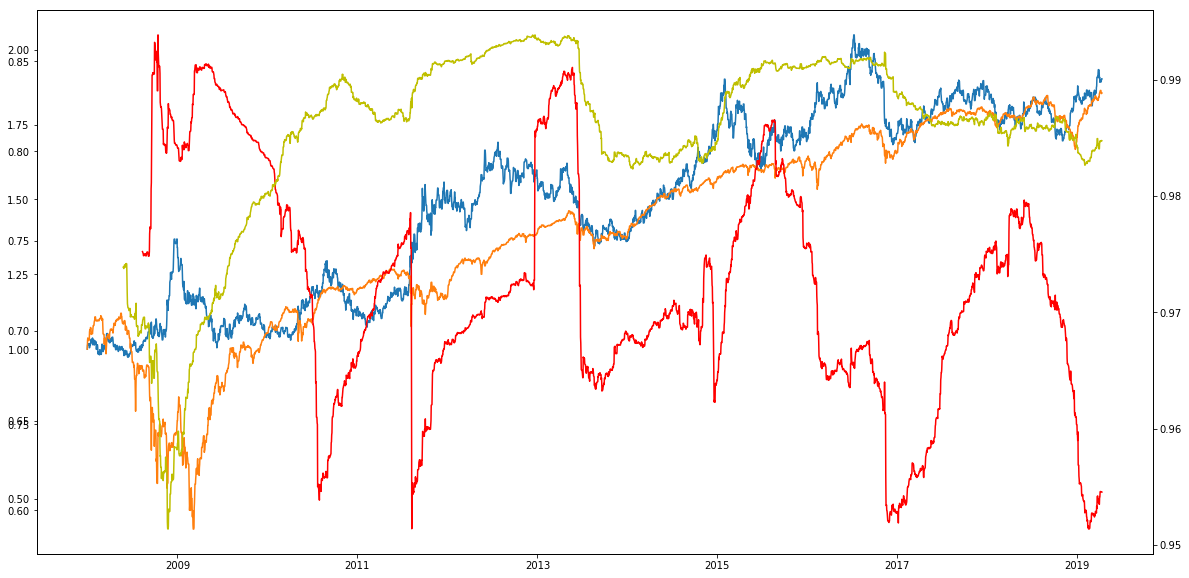

In [279]:
plt.figure(figsize=(20,10))
plt.plot(TLT.loc["2008-01-01":]/TLT.loc["2008-01-01"])
plt.plot(PFF.loc["2008-01-01":]/PFF.loc["2008-01-01"])
ax1=plt.twinx()
ax1.plot(all_ar,color='r')
ax2=plt.twinx()
ax2.plot(gv_ar,color='y')
plt.legend()
plt.show()

In [280]:
z_all=(pd.rolling_mean(all_ar,window=15)-pd.rolling_mean(all_ar,window=365))/pd.rolling_std(all_ar,window=365)
gv_all=(pd.rolling_mean(gv_ar,window=15)-pd.rolling_mean(gv_ar,window=365))/pd.rolling_std(gv_ar,window=365)

C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=365,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=365,center=False).std()
  """Entry point for launching an IPython kernel.
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be rem

In [383]:
concat_z=pd.concat([z_all,gv_all],axis=1).dropna()
concat_z.columns=["all","gv"]
z_change=((pd.rolling_mean(concat_z,window=15)-pd.rolling_mean(concat_z,window=180))).dropna()

C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=180,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


In [301]:
weight=pd.DataFrame(columns=["tlt","pff","cash"])
weight["pff"]=(concat_z["all"]>concat_z["gv"]+0)/1
weight["tlt"]=(concat_z["all"]<concat_z["gv"]-0)/1
weight[weight.sum(axis=1)<1]=weight[weight.sum(axis=1)<1]+0.5
#correct_index=z_change[(z_change<-0.5).sum(axis=1)==2].index
#weight["tlt"].loc[correct_index]=0
#weight["pff"].loc[correct_index]=0
weight["cash"]=1-weight.sum(axis=1)

In [302]:
target_return=pd.concat([TLT_return,PFF_return,pd.DataFrame(np.ones(len(PFF_return)),index=PFF_return.index)],axis=1).loc[weight.index]
target_return.columns=["tlt","pff","cash"]

In [303]:
allocation_price=(weight.shift(1)*target_return).sum(axis=1)[1:].cumprod()

In [304]:
allocation_price[-1]

1.7687882100442245

C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
  """
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=365,center=False).mean()
  """
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=365,center=False).std()
  """
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
  
C:\Users\Sascha683\anaconda\lib\site-pa

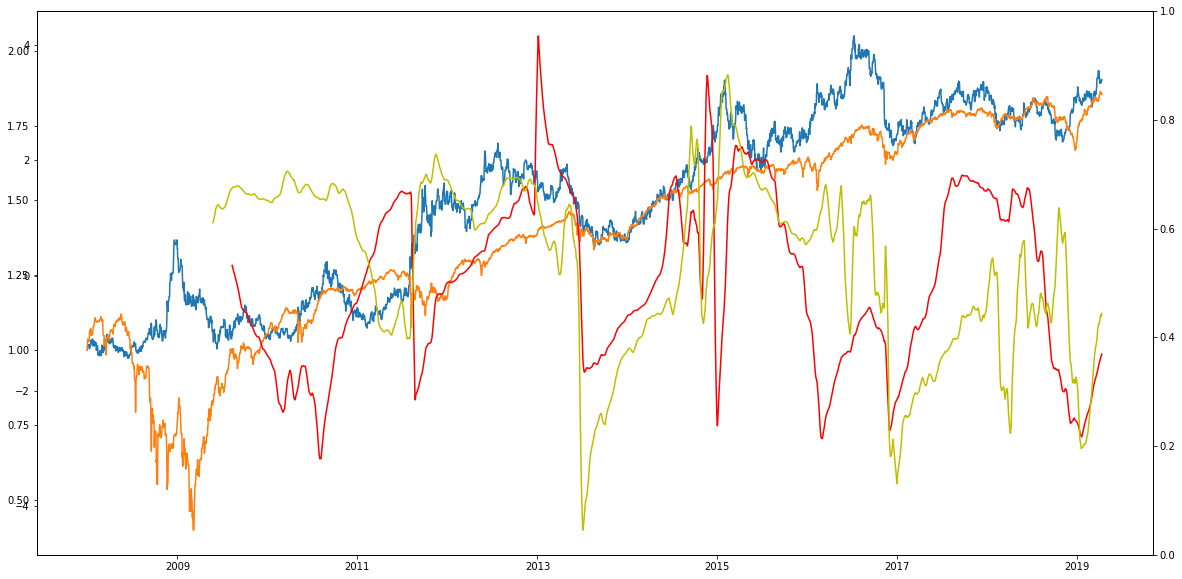

In [305]:
plt.figure(figsize=(20,10))
plt.plot(TLT.loc["2008-01-01":]/TLT.loc["2008-01-01"])
plt.plot(PFF.loc["2008-01-01":]/PFF.loc["2008-01-01"])
ax1=plt.twinx()
ax1.plot(((pd.rolling_mean(all_ar,window=15)-pd.rolling_mean(all_ar,window=365))/pd.rolling_std(all_ar,window=365)).loc["2008-01-01":],color='r')
ax1.plot(((pd.rolling_mean(gv_ar,window=15)-pd.rolling_mean(gv_ar,window=365))/pd.rolling_std(gv_ar,window=365)).loc["2008-01-01":],color='y')
ax2=plt.twinx()
#ax2.plot((pd.rolling_mean(concat_z,window=15)-pd.rolling_mean(concat_z,window=180)).loc["2015-01-01":],color="black")
plt.legend()
plt.show()

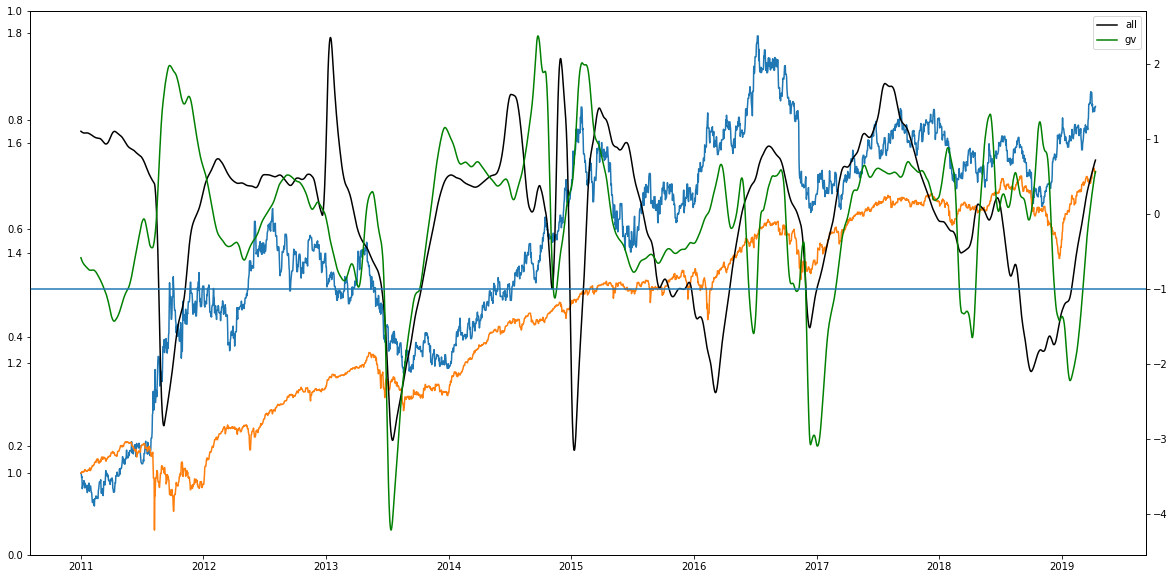

In [384]:
plt.figure(figsize=(20,10))
plt.plot(TLT.loc["2011-01-01":]/TLT.loc["2011-01-01"])
plt.plot(PFF.loc["2011-01-01":]/PFF.loc["2011-01-01"])
ax1=plt.twinx()
#ax1.plot(((pd.rolling_mean(all_ar,window=15)-pd.rolling_mean(all_ar,window=365))/pd.rolling_std(all_ar,window=365)).loc["2015-01-01":],color='r')
#ax1.plot(((pd.rolling_mean(gv_ar,window=15)-pd.rolling_mean(gv_ar,window=365))/pd.rolling_std(gv_ar,window=365)).loc["2015-01-01":],color='y')
ax2=plt.twinx()
ax2.plot(z_change.loc["2011-01-01":]["all"],color="black")
ax2.plot(z_change.loc["2011-01-01":]["gv"],color="green")
ax2.axhline(y=-1)
plt.legend()
plt.show()

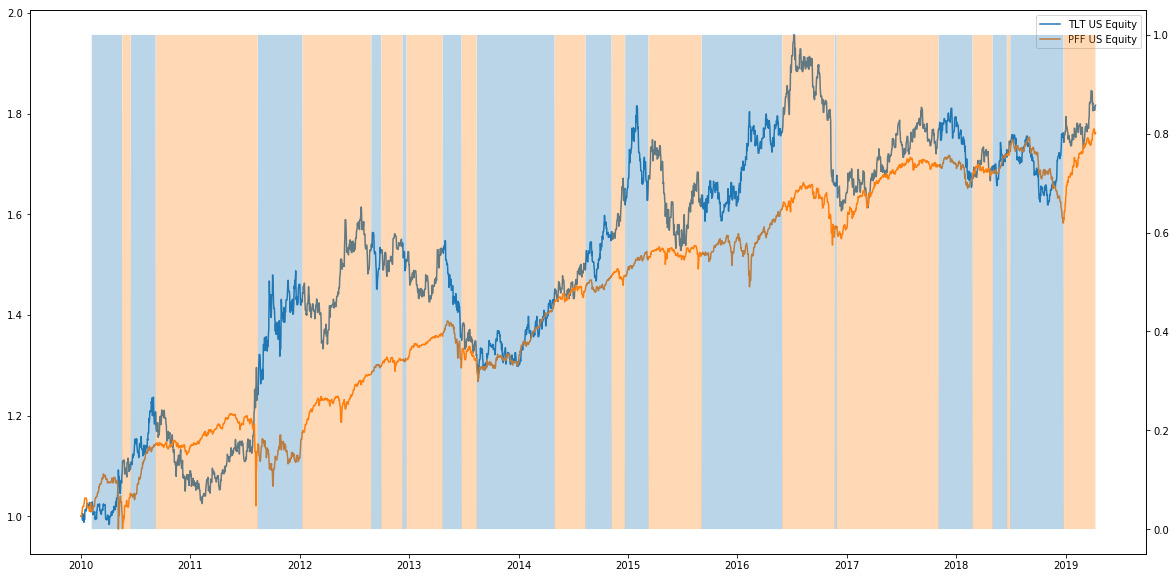

In [417]:
plt.figure(figsize=(20,10))
plt.plot(TLT.loc["2010-01-01":]/TLT.loc["2010-01-01"])
plt.plot(PFF.loc["2010-01-01":]/PFF.loc["2010-01-01"])
plt.legend()
ax1=plt.twinx()
ax1.fill_between(weight["tlt"].index,0,weight["tlt"].values,alpha='0.3',label='tlt')
ax1.fill_between(weight["pff"].index,0,weight["pff"].values,alpha='0.3',label='pff')
plt.show()

In [385]:
weight=pd.DataFrame(columns=["tlt","pff","cash"])
weight["pff"]=(z_change["all"]>z_change["gv"]+0)/1
weight["tlt"]=(z_change["all"]<z_change["gv"]-0)/1
#weight[weight.sum(axis=1)<1]=weight[weight.sum(axis=1)<1]+0.5
#correct_index=z_change[(z_change<-1).sum(axis=1)==2].index
#weight["tlt"].loc[correct_index]=0
#weight["pff"].loc[correct_index]=0
weight["cash"]=1-weight.sum(axis=1)
target_return=pd.concat([TLT_return,PFF_return,pd.DataFrame(np.ones(len(PFF_return)),index=PFF_return.index)],axis=1).loc[weight.index]
target_return.columns=["tlt","pff","cash"]
allocation_price_PFF=(weight.shift(1)*target_return).sum(axis=1)[1:].cumprod()
allocation_price_PFF[-1]

2.0423863202956549

In [386]:
weight=pd.DataFrame(columns=["tlt","pff","cash"])
weight["pff"]=(z_change["all"]>z_change["gv"]+0)/1
weight["tlt"]=(z_change["all"]<z_change["gv"]-0)/1
#weight[weight.sum(axis=1)<1]=weight[weight.sum(axis=1)<1]+0.5
#correct_index=z_change[(z_change<-1).sum(axis=1)==2].index
#weight["tlt"].loc[correct_index]=0
#weight["pff"].loc[correct_index]=0
weight["cash"]=1-weight.sum(axis=1)
target_return=pd.concat([TLT_return,HYB_return,pd.DataFrame(np.ones(len(HYB_return)),index=HYB_return.index)],axis=1).loc[weight.index]
target_return.columns=["tlt","pff","cash"]
allocation_price_HYB=(weight.shift(1)*target_return).sum(axis=1)[1:].cumprod()
allocation_price_HYB[-1]

2.150093112273904

In [428]:
weight=pd.DataFrame(columns=["tlt","pff","cash"])
weight["pff"]=(z_change["all"]>z_change["gv"]+0)/1
weight["tlt"]=(z_change["all"]<z_change["gv"]-0)/1
#weight[weight.sum(axis=1)<1]=weight[weight.sum(axis=1)<1]+0.5
#correct_index=z_change[(z_change<-1).sum(axis=1)==2].index
#weight["tlt"].loc[correct_index]=0
#weight["pff"].loc[correct_index]=0
weight["cash"]=1-weight.sum(axis=1)
target_return=pd.concat([TLT_return,average_return,pd.DataFrame(np.ones(len(average_return)),index=average_return.index)],axis=1).loc[weight.index]
target_return.columns=["tlt","pff","cash"]
allocation_price_EMB=(weight.shift(1)*target_return).sum(axis=1)[1:].cumprod()
allocation_price_EMB[-1]

2.151684673005374

In [427]:
average_return=(EMB_return+HYB_return+PFF_return)/3

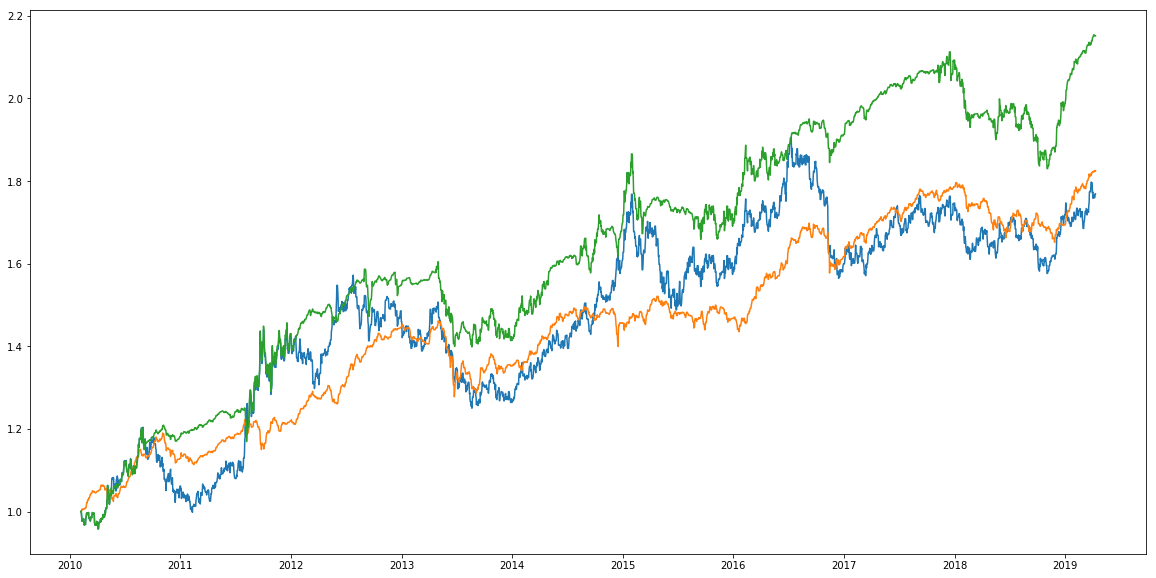

In [429]:
plt.figure(figsize=(20,10))
plt.plot(TLT.loc[allocation_price.index]/TLT.loc[allocation_price.index[0]])
plt.plot(EMB.loc[allocation_price.index]/EMB.loc[allocation_price.index[0]])
#plt.plot(allocation_price_PFF)
#plt.plot(allocation_price_HYB)
plt.plot(allocation_price_EMB)
plt.show()

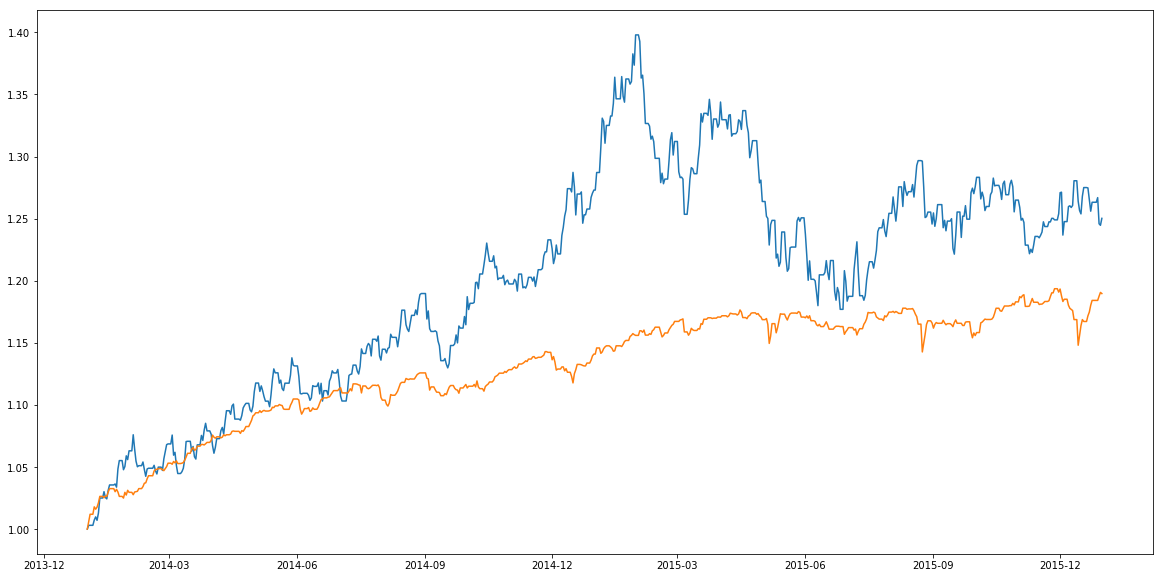

In [422]:
plt.figure(figsize=(20,10))
plt.plot(TLT.loc["2014-01-01":"2015-12-31"]/TLT.loc["2014-01-01":"2015-12-31"][0])
plt.plot(PFF.loc["2014-01-01":"2015-12-31"]/PFF.loc["2014-01-01":"2015-12-31"][0])
plt.show()

In [420]:
abs(weight-weight.shift(1)).sum().sum()/9*0.002

0.012

5

In [392]:
allocation_price[-1]**(365.0/len(allocation_price))

1.0920837999699669

In [393]:
allocation_price

2010-02-07    1.000000
2010-02-08    1.001305
2010-02-09    0.991303
2010-02-10    0.981845
2010-02-11    0.976517
2010-02-12    0.980540
2010-02-13    0.980540
2010-02-14    0.980540
2010-02-15    0.980540
2010-02-16    0.982387
2010-02-17    0.971190
2010-02-18    0.967276
2010-02-19    0.972494
2010-02-20    0.972494
2010-02-21    0.972494
2010-02-22    0.968472
2010-02-23    0.983585
2010-02-24    0.985976
2010-02-25    0.991520
2010-02-26    0.996631
2010-02-27    0.996631
2010-02-28    0.996631
2010-03-01    0.996191
2010-03-02    0.994881
2010-03-03    0.992373
2010-03-04    0.997609
2010-03-05    0.984520
2010-03-06    0.984520
2010-03-07    0.984520
2010-03-08    0.979394
                ...   
2019-03-13    2.207412
2019-03-14    2.211449
2019-03-15    2.217283
2019-03-16    2.217283
2019-03-17    2.217283
2019-03-18    2.221650
2019-03-19    2.224830
2019-03-20    2.225615
2019-03-21    2.236653
2019-03-22    2.231967
2019-03-23    2.231967
2019-03-24    2.231967
2019-03-25 